#

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Q1 Simple Example

Let $u : \mathbb{R}^2 \rightarrow \mathbb {R}$ be the our desired solution to the PDE:

$$ \frac{\partial u}{\partial x} + \frac{\partial u}{\partial y} = 1$$

Subject to some boundary data and initial conditions. We will do the two following things in this notebook.

The first will be to calculate analytically (using the characterstic method) the general solution to the problem above and visualise the solution $u$. The second will be to visualise the characteristic projections for our solution under different boundary and initial conditions to gain a better geometric understanding of when a unique solution can and cannot be found.


Our equation has the form:
$$ a(x,y,u)\frac{\partial u}{\partial x} + b(x,y,u)\frac{\partial u}{\partial y} = c(x,y,u)$$

The vector $$ (a \space b \space c)^T $$ is normal to the solution surface of $u$ i.e. $S = \{(x, y, u(x,y)) \in \mathbb{R}^3 : u(x,y) - z = 0\}$ where $z \in \mathbb{R}$ is some constant. This can be seen by noting the following.

Let,
$$ G(p) = u(x,y) - z, p \in \mathbb{R^2}$$
Then, 
$$ \nabla G = (\frac{\partial u}{\partial x} \space \frac{\partial u}{\partial y} \space -1)^T$$
Take any curve on $S$ and let $s$ be determined by the initial conditions provided and $t$ parametrise where along the curve (the characteristic determine by s) we are (so $s$ is fixed) $\gamma (s, t) : \mathbb{R}^2 \rightarrow \mathbb{R}^3$. Then $\forall t \in \mathbb{R}$, $\gamma (s, t) \in S$ so $G(\gamma(s, t)) = 0$

What $\gamma$ is doing is that it is mapping $(s,t)$ to $(x(s,t) \quad y(s,t) \quad u(x, y))$

Then, taking the derivative with respect to $t$ we get (using the chain rule):

$$ \frac{d}{dt}G(\gamma(s, t)) = \nabla G (\gamma(s, t)) \cdot \frac{d \gamma}{dt} = 0$$

Hence, for our curve $\gamma$ to be on the solution surface $S$ it must satisfy the above!

Looking at the original form of the equation we are trying to solve we see that if we let,

$$ \frac{d \gamma}{dt} = (a \space b \space c)^T$$

Hence we get, 
$$ \frac{d \gamma}{dt} = (\frac{dx}{dt} \quad \frac{dy}{dt} \quad \frac{du}{dt}) = (a \quad b \quad c)$$

Then we satify the equation assuming that our initial conditions parametrised by $s$ are valid! Furthermore, we can sweep across $s$ to stitch together a general solution!

Now! Let us find a general solution to our original problem (i.e. without specifiying initial conditions)!

Immediately we see the following:

$$\frac{dx}{dt} = 1 \quad \frac{dy}{dt} = 1 \quad \frac{du}{dt} = 1$$

So solving these using $differential$ $ratios$ we see,

$$ \frac{dx}{dy} = 1 \quad \frac{du}{dy} = 1 $$
So solving these we get, 
$$ x = y + C_0 \quad u = y + C_1 $$

Rearranging gives,
$$C_0 = x - y \quad C_1 = u - y$$

Essentially when our condition is satisfied, we can express our solution in terms of two functions which are constant.
So, let $f = u-y$ and $g = x-y$. As these functions are constant along a valid characteristic, we can apply an arbritrary function $F$ to either one to transform it to the other i.e. $f = F(g)$. Using this we get,

$$f = F(g)$$
$$u - y = F(x-y)$$
$$u = y + F(x-y)$$
Which is our general solution to our intial problem! $F$ can be determined once the initial conditions are known!

Let's introduce some different conditions!

(1) $u = 0$ on $x+y = 0$

(2) $u = 0$ on $x = y$

(3) $u = x$ on $x = y$

Starting with (1), we can do the following: 

$$ u = y + F(x-y) + \frac{x-y}{2} - \frac{x-y}{2}$$
$$ u = \frac{x+y}{2} + (F(x-y) - \frac{x-y}{2})$$
$$ u = \frac{x+y}{2} + H(x-y) $$
Where $H$ is some function and we can see that if $u = 0$ on $x+y = 0$ we get,
$$H(x - y) = 0$$

So as we move across our intial curve to get our characteristic curves and hence our solution. We get a general solution for $u$ of 
$$u(x,y) = \frac{x+y}{2}$$
Which satisfies our PDE!

So lets take a look at our $characteristic$  $projections$ and our initial curve.

The gradients for our intitial curve as we vary $s$ is $(1, -1)^T$ as
$$x(s) = t + s$$
$$y(s) = t - s$$

The gradient as we move along our characteristic projection at some $s$ is $(a,b)^T = (1,1)^T$

These two gradients are orthogonal.

In [21]:
s = np.arange(-70, 70, 10)
t = np.arange(-50, 70, 10)

x = lambda tau, s_initial: tau + s_initial
y = lambda tau, s_initial: tau - s_initial

/var/folders/3l/q_yssm517fj86sqc7nn2zrcm0000gn/T/ipykernel_99344/4028267956.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


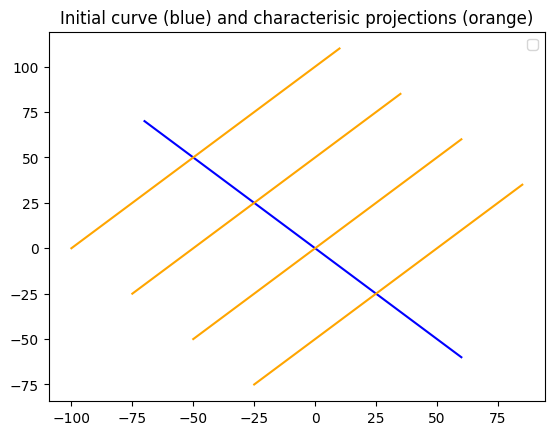

In [23]:
fig, ax = plt.subplots()

# Initial Curve

x_t = x(0, s)
y_t = y(0, s)
ax.plot(x_t, y_t, color = 'b')

# Characteristic Projections

for i in range(-50,50,25):
    x_t = x(t, i)
    y_t = y(t, i)
    ax.plot(x_t, y_t, color = 'orange')

plt.title('Initial curve (blue) and characterisic projections (orange)')
plt.legend()
plt.show()

Here in our image, our initial curve is shown in blue with the characteristic projections shown in orange. As we see, that for any given value of $s$ i.e. moving to some point along the blue line, we can find a unique orthogonal characteristic projection. Using these characterstic projections we can take their union across the blue line to find the final solution for $u$ (which luckily in this example can be turned into a general solution!).

For (2) we get, 

$$ x(s) = t + s $$
$$y(s) = t + s $$

So we see that our initial curve is tangent to our characterstic projections as 

$$(\frac{dx}{ds}, \frac{dy}{ds}) = (1,1) = (\frac{dx}{dt}, \frac{dy}{dt})$$

In [36]:
s = np.arange(-70, 100, 10)
t = np.arange(-50, 50, 10)

x = lambda tau, s_initial: tau + s_initial
y = lambda tau, s_initial: tau + s_initial

/var/folders/3l/q_yssm517fj86sqc7nn2zrcm0000gn/T/ipykernel_99344/2817094887.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


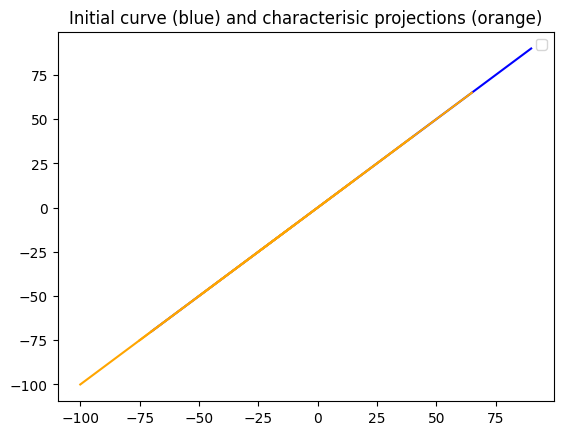

In [38]:
fig, ax = plt.subplots()

# Initial Curve
x_initial = x(0, s)
y_initial = y(0, s)
ax.plot(x_initial, y_initial, color = 'b')

for i in range(-50,50,25):
    x_proj = x(t, i)
    y_proj = y(t, i)
    ax.plot(x_proj, y_proj, color = 'orange')


plt.title('Initial curve (blue) and characterisic projections (orange)')
plt.legend()
plt.show()

In the above example we see that our initial curve is tangent to the characterstic curves (and are on top of each other). Hence, moving along our initial curve we do not get a unique characterstic curve for every point i.e. potentially multiple solutions for a given $s$. Investigating further, we can see that along our initial curve we have, $x-y = 0$.
So using our general solution along our initial curve where $u = 0$ we have,
$$0 = x + H(0)$$
Hence,
$$H(0) = -x$$
But $H(0)$ must be a constant, thus this is impossible. Consequently, for this initial curve, there is no solution.

For (3), we would get the same graph as above i.e. with the initial curve itself being a characteristic projection. But using our general solution we get, 
$$x = x + H(0)$$
$$H(0) = 0$$
Where $H$ can be anything as long as it maps to zero for $H(0)$. Hence, our solution would be non-unique for any point on our initial curve.